In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset
df=pd.read_csv("/content/sample_data/dataset_heart.csv")
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [ ]:
 #viewing columns
df.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

In [ ]:
#dataset basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

## Step 1: Renaming Columns

In [ ]:
#Formatting column name to developer friendly variable names: changing to title case, replacing interword spaces with underscore and removing trailing spaces

def formatColumnNames(data:pd.DataFrame, columnList)->pd.DataFrame:
  dict={}
  for columnName in columnList:
    formattedName=columnName.strip().title().replace(" ","_")
    dict[columnName]=formattedName

  data.rename(columns=dict, inplace=True)
  return data

df1=formatColumnNames(df,df.columns)
print(df1.columns)
df1.head()

Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Serum_Cholestoral', 'Fasting_Blood_Sugar',
       'Resting_Electrocardiographic_Results', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'Oldpeak', 'St_Segment', 'Major_Vessels',
       'Thal', 'Heart_Disease'],
      dtype='object')


,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,St_Segment,Major_Vessels,Thal,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


# Step 2: DataType Conversion


In [ ]:
#checking no.of unique values in each column.
df1.nunique()

Age                                      41
Sex                                       2
Chest_Pain_Type                           4
Resting_Blood_Pressure                   47
Serum_Cholestoral                       144
Fasting_Blood_Sugar                       2
Resting_Electrocardiographic_Results      3
Max_Heart_Rate                           90
Exercise_Induced_Angina                   2
Oldpeak                                  39
St_Segment                                3
Major_Vessels                             4
Thal                                      3
Heart_Disease                             2
dtype: int64

In [ ]:
# converting  to categorical variables, where unique values are lesser
def convertColumnDtype(data:pd.DataFrame, columnList, type)->pd.DataFrame:
  for column in columnList:
    data[column]=data[column].astype(type)
  return data

categoryColumns='Sex,Chest_Pain_Type,Fasting_Blood_Sugar,Exercise_Induced_Angina,Resting_Electrocardiographic_Results,Thal,Heart_Disease'.split(',')
df2=convertColumnDtype(df1,categoryColumns,'category')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Age                                   270 non-null    int64   
 1   Sex                                   270 non-null    category
 2   Chest_Pain_Type                       270 non-null    category
 3   Resting_Blood_Pressure                270 non-null    int64   
 4   Serum_Cholestoral                     270 non-null    int64   
 5   Fasting_Blood_Sugar                   270 non-null    category
 6   Resting_Electrocardiographic_Results  270 non-null    category
 7   Max_Heart_Rate                        270 non-null    int64   
 8   Exercise_Induced_Angina               270 non-null    category
 9   Oldpeak                               270 non-null    float64 
 10  St_Segment                            270 non-null    int64   
 11  Major_

# Step 3: Duplicate Handling

In [ ]:
#checking duplicated records
df2[df2.duplicated()].count()

#no duplicate records

Age                                     0
Sex                                     0
Chest_Pain_Type                         0
Resting_Blood_Pressure                  0
Serum_Cholestoral                       0
Fasting_Blood_Sugar                     0
Resting_Electrocardiographic_Results    0
Max_Heart_Rate                          0
Exercise_Induced_Angina                 0
Oldpeak                                 0
St_Segment                              0
Major_Vessels                           0
Thal                                    0
Heart_Disease                           0
dtype: int64

# Step 4: Outlier Detection

In [ ]:
# basic statistics for the dataset
df2.describe()

#we can infer Serum_Cholestoral, Resting_Blood_Pressure, Oldpeak may contain outliers

,Age,Resting_Blood_Pressure,Serum_Cholestoral,Max_Heart_Rate,Oldpeak,St_Segment,Major_Vessels
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,1.585185,0.670370
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.614390,0.943896
min,29.000000,94.000000,126.000000,71.000000,0.00000,1.000000,0.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,1.000000,0.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,2.000000,0.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,2.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,3.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Resting_Blood_Pressure'}>,
        <Axes: title={'center': 'Serum_Cholestoral'}>],
       [<Axes: title={'center': 'Max_Heart_Rate'}>,
        <Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'St_Segment'}>],
       [<Axes: title={'center': 'Major_Vessels'}>, <Axes: >, <Axes: >]],
      dtype=object)

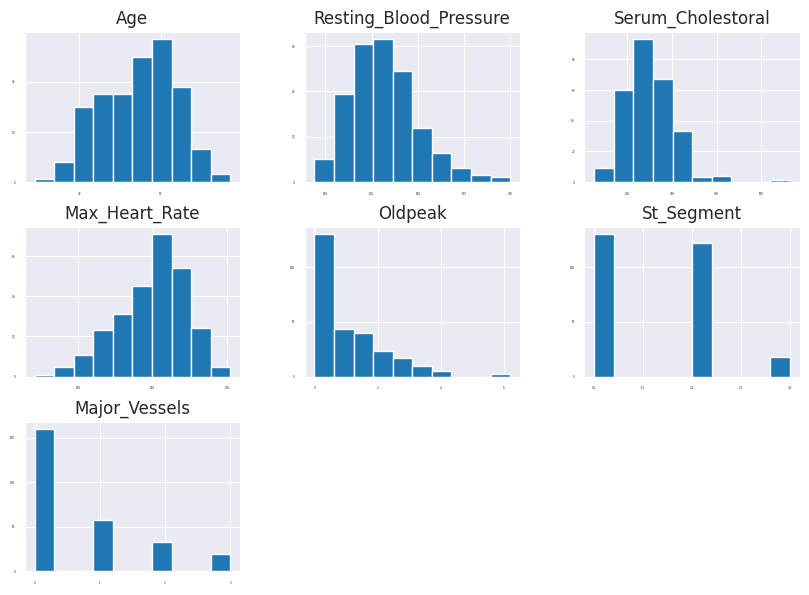

In [ ]:
#using histograms to check skewness of data distribution of column values
sns.set_style('darkgrid')
df2.hist(figsize=(10,7), xlabelsize=2,ylabelsize=2)

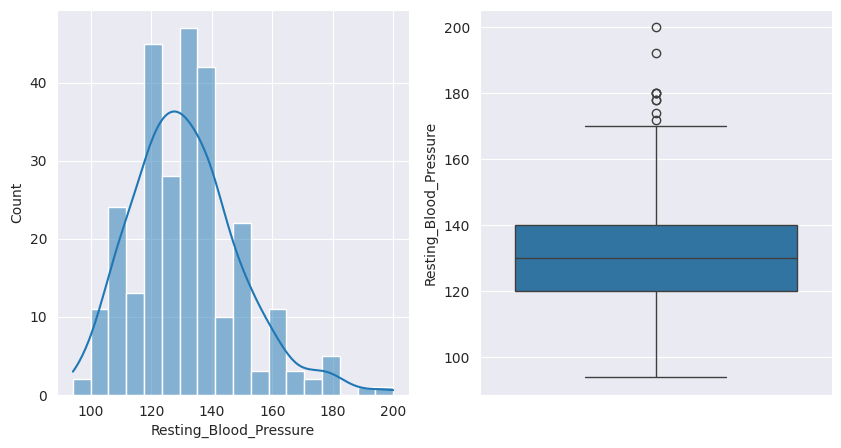

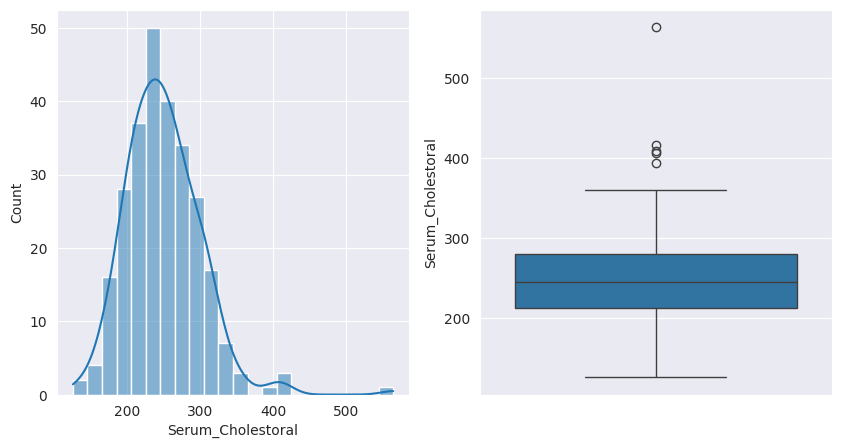

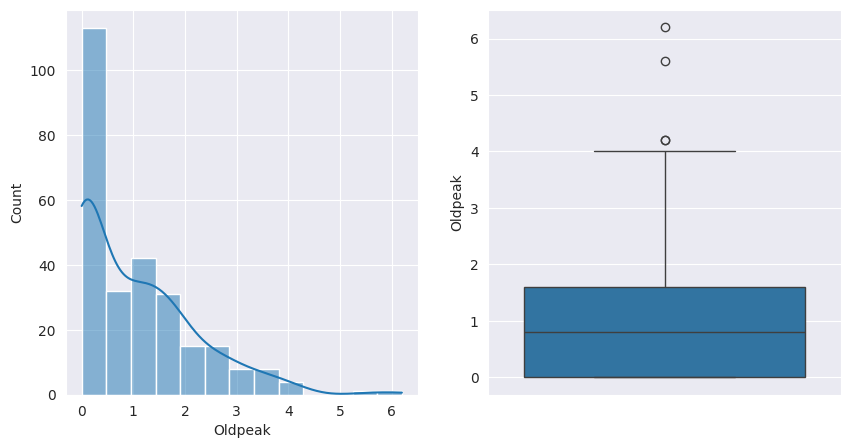

In [ ]:
# visualizing outliers in columns using boxplots and histograms

def visualizeOutliers(df:pd.DataFrame, columnList) :
  df.dropna()
  for column in columnList:
    fig,axes=plt.subplots(figsize=(10,5),ncols=2)
    sns.histplot(data=df[column], kde=True, ax=axes[0])
    sns.boxplot(data=df, y=column, ax=axes[1])


visualizeOutliers(df2,['Resting_Blood_Pressure','Serum_Cholestoral','Oldpeak'])

In [ ]:
#extracting outliers values for column

def extractOutlierValues(df:pd.DataFrame, columnList):
  outlier_dict={}
  for column in columnList:
    outlier=plt.boxplot(df2[column])['fliers'][0].get_ydata()
    outlier_dict.update({column:outlier})
  plt.close()  # not displaying the boxplot here in output
  return outlier_dict

outliers=extractOutlierValues(df2,['Resting_Blood_Pressure','Serum_Cholestoral','Oldpeak'])
outliers

{'Resting_Blood_Pressure': array([174, 178, 180, 200, 192, 178, 180, 180, 172]),
 'Serum_Cholestoral': array([564, 407, 417, 409, 394]),
 'Oldpeak': array([4.2, 5.6, 4.2, 6.2])}

In [ ]:
#replacing  outliers with respective median values depending on Heart_Disease presence and absence

median_chol_heart_disease_neg=df2.loc[df2['Heart_Disease']==1,'Serum_Cholestoral'].median()
median_chol_heart_disease_pos=df2.loc[df2['Heart_Disease']==2,'Serum_Cholestoral'].median()

df2.loc[df2['Heart_Disease']==1,'Serum_Cholestoral']=df2['Serum_Cholestoral'].apply(lambda x:median_chol_heart_disease_neg  if x in outliers.get('Serum_Cholestoral') else x )
df2.loc[df2['Heart_Disease']==2,'Serum_Cholestoral']=df2['Serum_Cholestoral'].apply(lambda x:median_chol_heart_disease_pos  if x in outliers.get('Serum_Cholestoral') else x )

df2['Oldpeak']=df2['Oldpeak'].apply(lambda x: df2['Oldpeak'].median() if x in outliers.get('Oldpeak') else x )




# Step 5: Missing Value Imputation

In [ ]:
df2.isnull().sum()

#no values as NaN

Age                                     0
Sex                                     0
Chest_Pain_Type                         0
Resting_Blood_Pressure                  0
Serum_Cholestoral                       0
Fasting_Blood_Sugar                     0
Resting_Electrocardiographic_Results    0
Max_Heart_Rate                          0
Exercise_Induced_Angina                 0
Oldpeak                                 0
St_Segment                              0
Major_Vessels                           0
Thal                                    0
Heart_Disease                           0
dtype: int64

In [ ]:
df2[df2.isnull().any(axis=1)]

#no values as NaN

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,St_Segment,Major_Vessels,Thal,Heart_Disease


In [ ]:
#sometimes missing values are imputed as 0 instaed of NaN, hence we need to check it
df2.eq(0).sum()

Age                                       0
Sex                                      87
Chest_Pain_Type                           0
Resting_Blood_Pressure                    0
Serum_Cholestoral                         0
Fasting_Blood_Sugar                     230
Resting_Electrocardiographic_Results    131
Max_Heart_Rate                            0
Exercise_Induced_Angina                 181
Oldpeak                                  85
St_Segment                                0
Major_Vessels                           160
Thal                                      0
Heart_Disease                             0
dtype: int64

In [ ]:
df2[df2.eq(0).any(axis=1)]

# 0 is a valid value for categorical variables Sex, Fasting_Blood_Sugar, Resting_ECG_Results,Exercise_Induced_Angina,Major_Vessels
#also for variable Oldpeak 0.0 can be a valid measured value

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,St_Segment,Major_Vessels,Thal,Heart_Disease
0,70,1,4,130,322.0,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,236.0,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261.0,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263.0,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269.0,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199.0,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263.0,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294.0,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192.0,0,0,148,0,0.4,2,0,6,1


# Step 6: Correlation analysis

<Axes: >

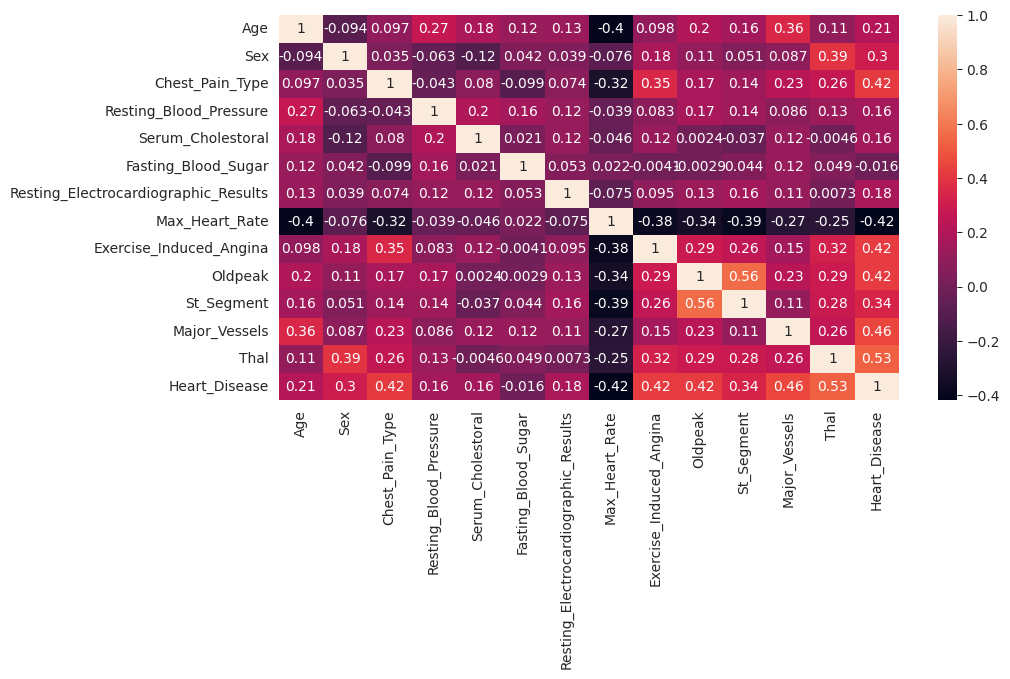

In [ ]:
#heatmap

fig,axes=plt.subplots(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True, ax=axes)

# we can infer:
# Heart_Diesease presence has high positive correlation with Age, Sex, Chest_Pain_Type, Exercised_Induce_Angina, Oldpeak, St_Segment, Major-Vessels,Thal
# Heart_Disease presence has considerable postive correlation with Resting Blood Pressue, Serum_Cholestoral
# Heart Disease presence has a strong negative correlation with Max_Heart_Rate
# Max_Heart_rate has high negative correlation with age

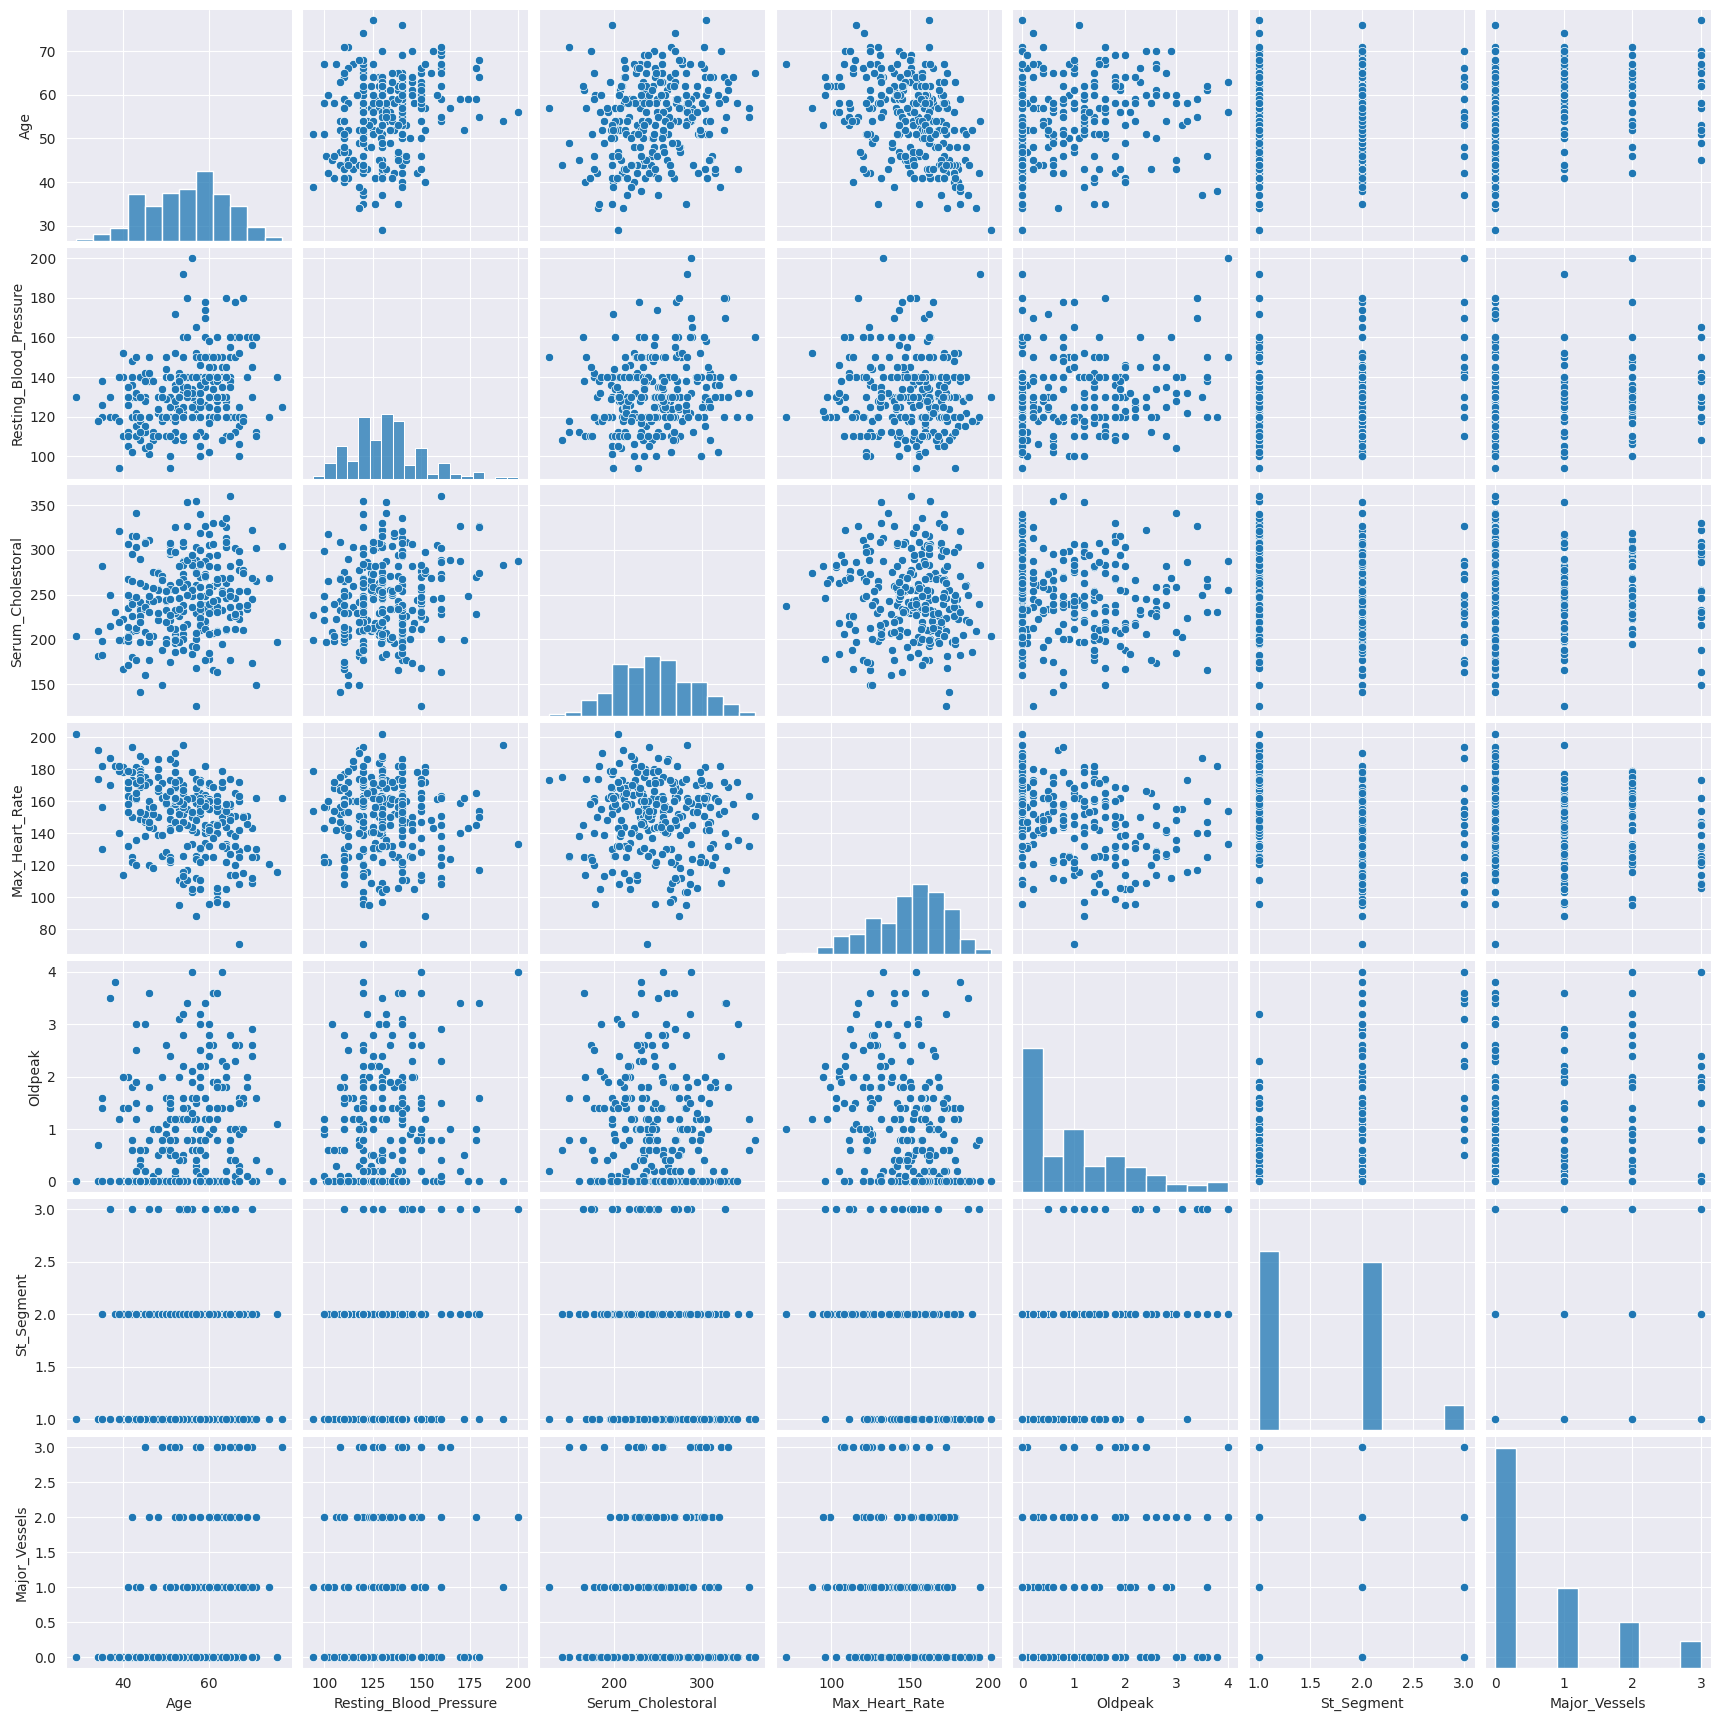

In [ ]:
#pairplot
sns.pairplot(data=df2)

# Step7: Transformation

In [ ]:
#Performing transformation for categorical columns
#one hot encoding for Thal and Chest_Pain_Type  column

df_transformed=pd.get_dummies(df2,columns=['Thal','Chest_Pain_Type'],dtype=int)
df_transformed.head()

,Age,Sex,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,St_Segment,Major_Vessels,Heart_Disease,Thal_3,Thal_6,Thal_7,Chest_Pain_Type_1,Chest_Pain_Type_2,Chest_Pain_Type_3,Chest_Pain_Type_4
0,70,1,130,322.0,0,2,109,0,2.4,2,3,2,1,0,0,0,0,0,1
1,67,0,115,236.0,0,2,160,0,1.6,2,0,1,0,0,1,0,0,1,0
2,57,1,124,261.0,0,0,141,0,0.3,1,0,2,0,0,1,0,1,0,0
3,64,1,128,263.0,0,0,105,1,0.2,2,1,1,0,0,1,0,0,0,1
4,74,0,120,269.0,0,2,121,1,0.2,1,1,1,1,0,0,0,1,0,0


# Step 8: Normalization and Standardization

In [ ]:
#performing Normalization and Standardization for numerical columns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_columns=['Resting_Blood_Pressure','Serum_Cholestoral','Max_Heart_Rate','Oldpeak','St_Segment']

normalizationScaler=MinMaxScaler()
df_transformed[numerical_columns]=normalizationScaler.fit_transform(df_transformed[numerical_columns])

df_transformed.head()


,Age,Sex,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,St_Segment,Major_Vessels,Heart_Disease,Thal_3,Thal_6,Thal_7,Chest_Pain_Type_1,Chest_Pain_Type_2,Chest_Pain_Type_3,Chest_Pain_Type_4
0,70,1,0.339623,0.837607,0,2,0.290076,0,0.600,0.5,3,2,1,0,0,0,0,0,1
1,67,0,0.198113,0.470085,0,2,0.679389,0,0.400,0.5,0,1,0,0,1,0,0,1,0
2,57,1,0.283019,0.576923,0,0,0.534351,0,0.075,0.0,0,2,0,0,1,0,1,0,0
3,64,1,0.320755,0.585470,0,0,0.259542,1,0.050,0.5,1,1,0,0,1,0,0,0,1
4,74,0,0.245283,0.611111,0,2,0.381679,1,0.050,0.0,1,1,1,0,0,0,1,0,0


**Question 3a:** Investigate basic statistics: patient counts, presence of heart disease, age distribution

Count of Total Patients:  270
Count of Patients with Heart Disease present: 120
Count of Patients with Heart Disease absent: 150


<Axes: xlabel='Age', ylabel='Count'>

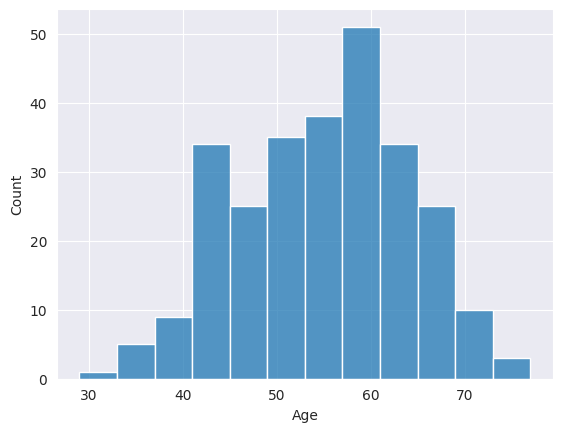

In [ ]:
print("Count of Total Patients: ",len(df2))
print("Count of Patients with Heart Disease present:",len(df2[df2['Heart_Disease']==2]))
print("Count of Patients with Heart Disease absent:",len(df2[df2['Heart_Disease']==1]))

sns.histplot(data=df2,x='Age')

 **Question 3b**: Analyze the presence of heart disease based on gender, age, and other relevant factors.

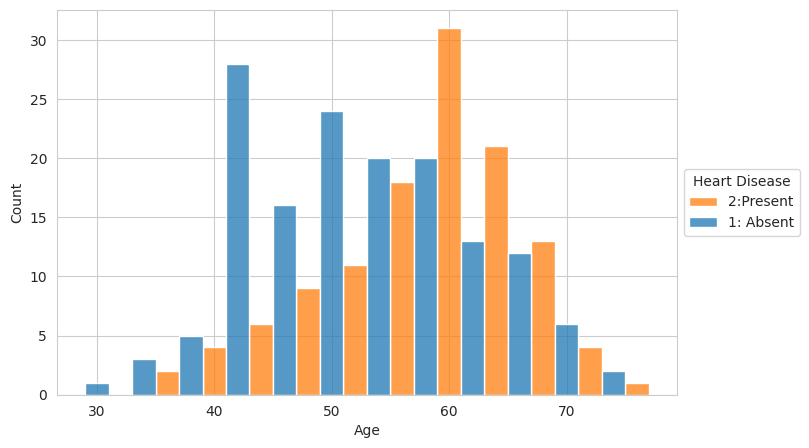

In [ ]:
#Distribution of Age vs Heart_Disease

sns.set_style("whitegrid")

fig,axes=plt.subplots(figsize=(8,5))
sns.histplot(data=df2,x='Age', ax=axes, hue='Heart_Disease', multiple='dodge' )
axes.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1,labels=['2:Present','1: Absent'], title="Heart Disease")

# we infer that at the higher ages there are more patients with  presence of heart disease
#age has a positive correlation with presence of heart disease



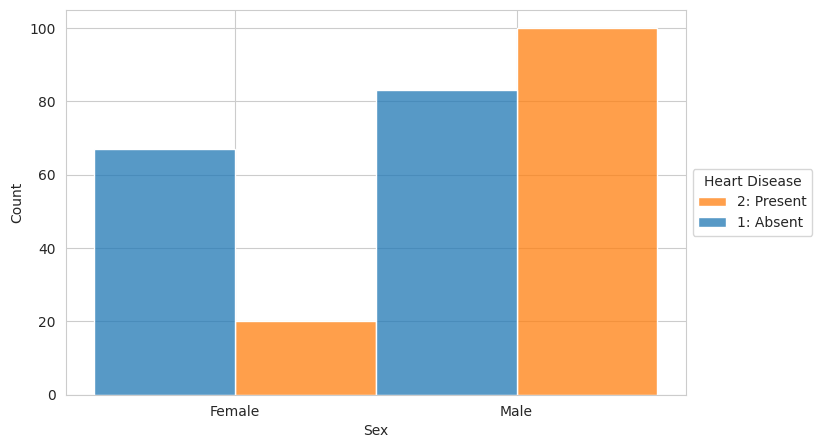

In [ ]:
#Relation of Gender vs Heart_Disease

fig,axes=plt.subplots(figsize=(8,5))
sns.histplot(data=df2,x='Sex', ax=axes, hue='Heart_Disease', multiple='dodge' )
axes.set_xticks(df2['Sex'].unique())
axes.set_xticklabels(df2['Sex'].unique().map({1:'Male',0:'Female'}))
axes.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1,labels=df2['Heart_Disease'].unique().map({1:'1: Absent',2:'2: Present'}), title="Heart Disease")

# we can see that the count of male (Sex=1) patients with heart diseases  (Heart_Disease=2) is the highest
#hence can infer males tend to have hear_diseases more han females

<ipython-input-69-defb3470b00b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(df2['Heart_Disease'].unique().map({1:'Absent',2:'Present'}))


[Text(0, 0, 'Present'), Text(1, 0, 'Absent')]

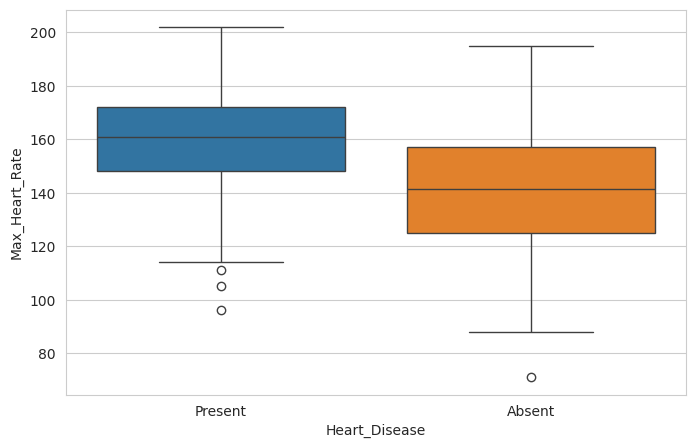

In [ ]:
#Relation of Max Heart Rate vs Heart_Disease


fig,axes=plt.subplots(figsize=(8,5))
sns.boxplot(data=df2,y='Max_Heart_Rate',x='Heart_Disease', hue='Heart_Disease', legend=False)
axes.set_xticklabels(df2['Heart_Disease'].unique().map({1:'Absent',2:'Present'}))

#so we can infer that max_heart_rate is lower for people with heart_disease  and hence these is a negative correlation

<Axes: ylabel='Resting_Blood_Pressure'>

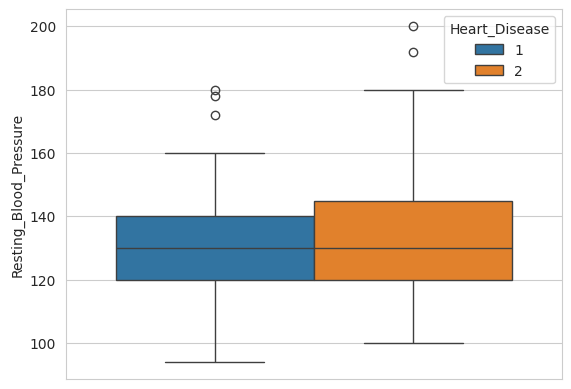

In [ ]:
#Relation of Resting_Blood_Pressure vs Heart_Disease
sns.boxplot(data=df2,y='Resting_Blood_Pressure' ,hue='Heart_Disease')

#Resting_Blood_Pressure is higher for patients with heart diseases

<Axes: ylabel='Oldpeak'>

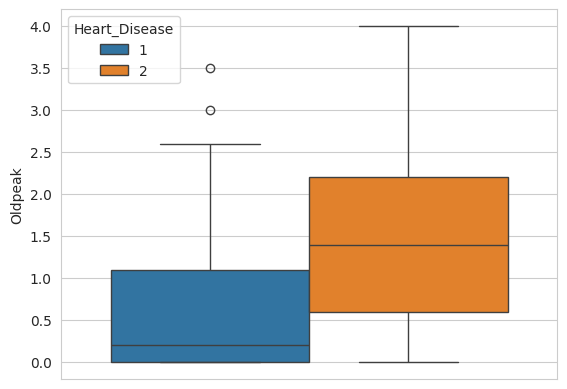

In [ ]:
#Relation of Oldpeak vs Heart_Disease
sns.boxplot(data=df2,y='Oldpeak', hue='Heart_Disease')

#OldPeak is higher for patients with heart diseases

<Axes: xlabel='St_Segment', ylabel='Count'>

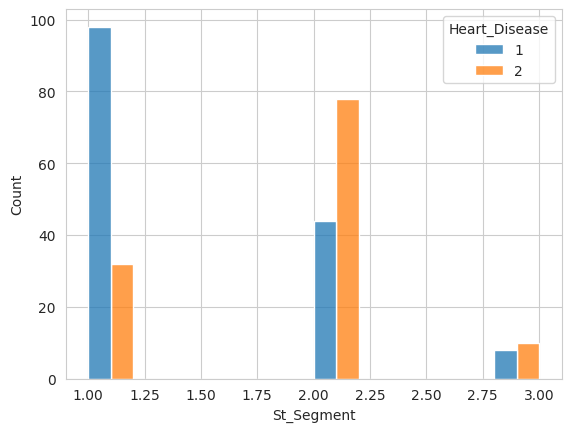

In [ ]:
#Relation of ST Segment vs Heart_Disease
sns.histplot(data=df2,x='St_Segment' ,hue='Heart_Disease', multiple='dodge')

#patient with ST Segmnet slope of 2 are more prone to show heart_diseases

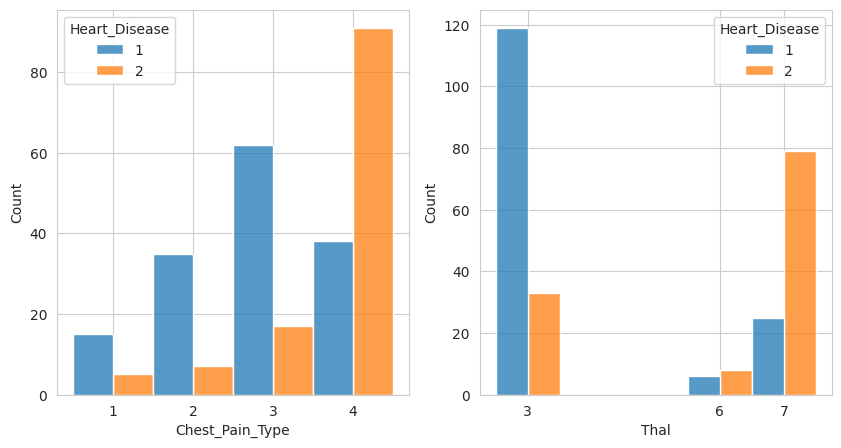

In [ ]:
#relationship with categorical variables like Chest_Pain_Type and Thal(Presence of Thalasemmia):

fig,axes=plt.subplots(figsize=(10,5), ncols=2)

sns.histplot(data=df2,x='Chest_Pain_Type' ,hue='Heart_Disease', multiple='dodge',ax=axes[0])
axes[0].set_xticks(df2['Chest_Pain_Type'].unique())


sns.histplot(data=df2,x='Thal',hue='Heart_Disease',multiple='dodge' ,ax=axes[1])
axes[1].set_xticks(df2['Thal'].unique())

#More patiens with Chest_Pain_type 4 tend to get heart diseases
#Thalasemmia positive patients with type 7, has more tendency  to get heart diseases

**Question 4a:** Explore correlations: Does cholesterol level correlate with the presence of heart disease?

In [ ]:
#defining a function for  regplot with hue

from matplotlib import colormaps
from matplotlib.lines import Line2D
def hue_regplot(data:pd.DataFrame,x,y,hue,ax, **kwargs):
  regplot=[]
  colors=colormaps.get_cmap('tab10')
  hueValues=data[hue].unique().sort_values()
  i=0
  legendElements=[]

  for value in hueValues:
    regplot.append(
        sns.regplot(data=data[data[hue]==value], x=x,y=y,color=colors(i),ax=ax, **kwargs)
        )

    legendElements.append(
          Line2D([0], [0], marker='o', color='w', label=value, markerfacecolor=colors(i), markersize=8)
      )
    i+=1
  ax.legend(handles=legendElements, title="Heart Disease", loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

  return regplot


[<Axes: xlabel='Serum_Cholestoral', ylabel='Age'>,
 <Axes: xlabel='Serum_Cholestoral', ylabel='Age'>]

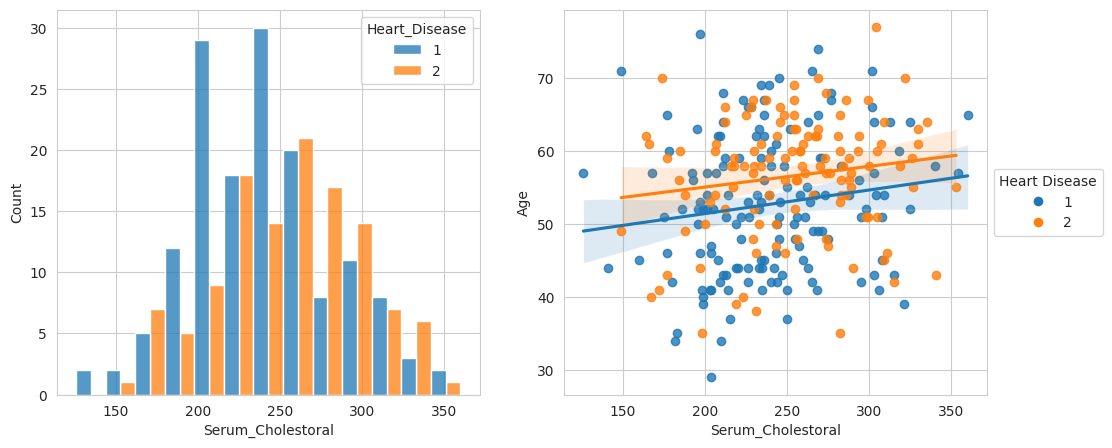

In [ ]:
fig,axes=plt.subplots(figsize=(12,5), ncols=2)
sns.histplot(data=df2,x='Serum_Cholestoral' , hue='Heart_Disease', multiple='dodge', ax=axes[0])
hue_regplot(data=df2,x='Serum_Cholestoral',y='Age' ,hue='Heart_Disease',ax=axes[1])

# we can infer from below histogram visualization, With the increase of Serum cholesterol level there is increase in count of patients with heart disease


#  If we plot the relationship of Serum Cholesterol with Age, we see that it has a positive correlation among them. So as age increases cholesterol level increases
# Also we can infer from the scatterplot, that more no.of  patients  with a high cholesterol level at a higher age, tend to show heart_disease positive  conditions




**Question 4b :** How does age relate to heart disease presence

,Age_Grp,Heart_Disease,Patient_Count,Patient_Percentage
0,50 to 70,1,89,48.108108
1,50 to 70,2,96,51.891892
2,less than 50,1,56,70.886076
3,less than 50,2,23,29.113924
4,more than 70,1,5,83.333333
5,more than 70,2,1,16.666667


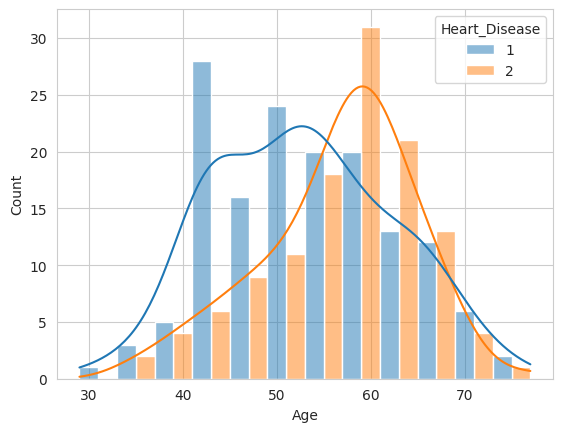

In [ ]:
def getAgeGrp(age):
  if(age<50): return 'less than 50'
  if(age>=50 and age<=70): return '50 to 70'
  if(age>70): return 'more than 70'

df_age_grp=df2.copy()
df_age_grp['Age_Grp']=df2['Age'].apply(lambda x:getAgeGrp(x))

df_age_grp1=df_age_grp.groupby(['Age_Grp','Heart_Disease'])['Age'].count().rename('Patient_Count').to_frame().reset_index()
df_age_grp1['Patient_Percentage']= 100*df_age_grp1['Patient_Count']/df_age_grp1.groupby('Age_Grp')['Patient_Count'].transform('sum')


sns.histplot (data=df2 , x='Age', hue='Heart_Disease', multiple='dodge', kde=True)
df_age_grp1

# we can infer as per below data and visualization that there are high patient counts(~51%) with heart_disease present in higher age group, i.e 50 to 70 yrs
#also we see a strong positive correlation of age with heart_disease

**Question 5a:** Complex  relationship visualization using heatmaps and pair plots

<Axes: >

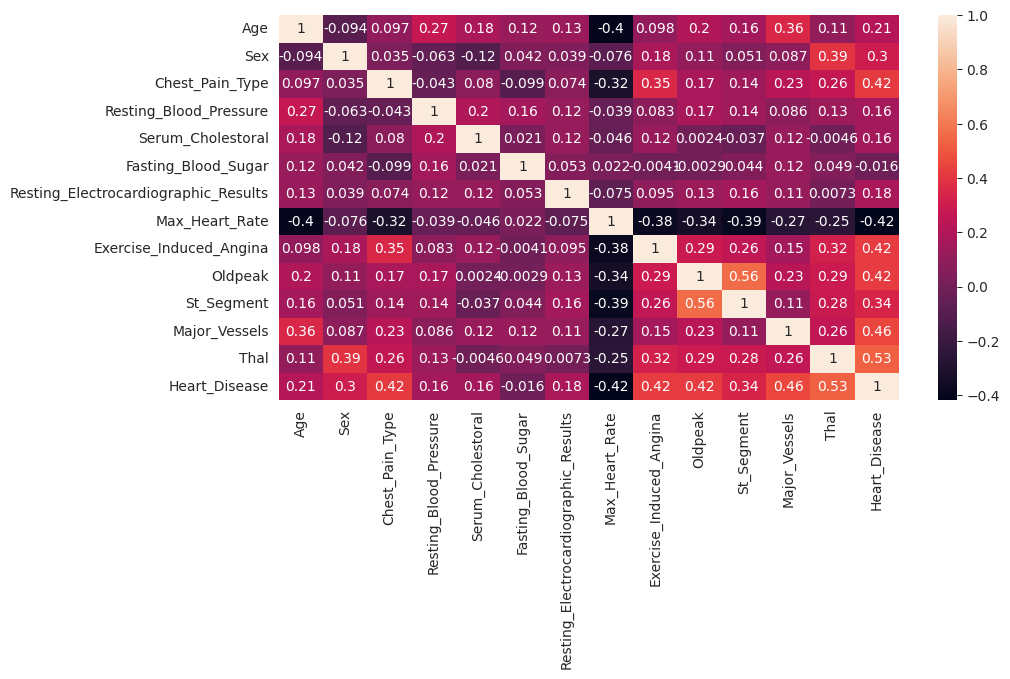

In [ ]:
fig,axes=plt.subplots(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True, ax=axes)

# we can infer:
# Heart_Diesease presence has high positive correlation with Age, Sex, Chest_Pain_Type, Exercised_Induce_Angina, Oldpeak, St_Segment, Major-Vessels,Thal
# Heart_Disease presence has considerable postive correlation with Resting Blood Pressue, Serum_Cholestoral
# Heart Disease presence has a strong negative correlation with Max_Heart_Rate
# Max_Heart_rate has high negative correlation with age


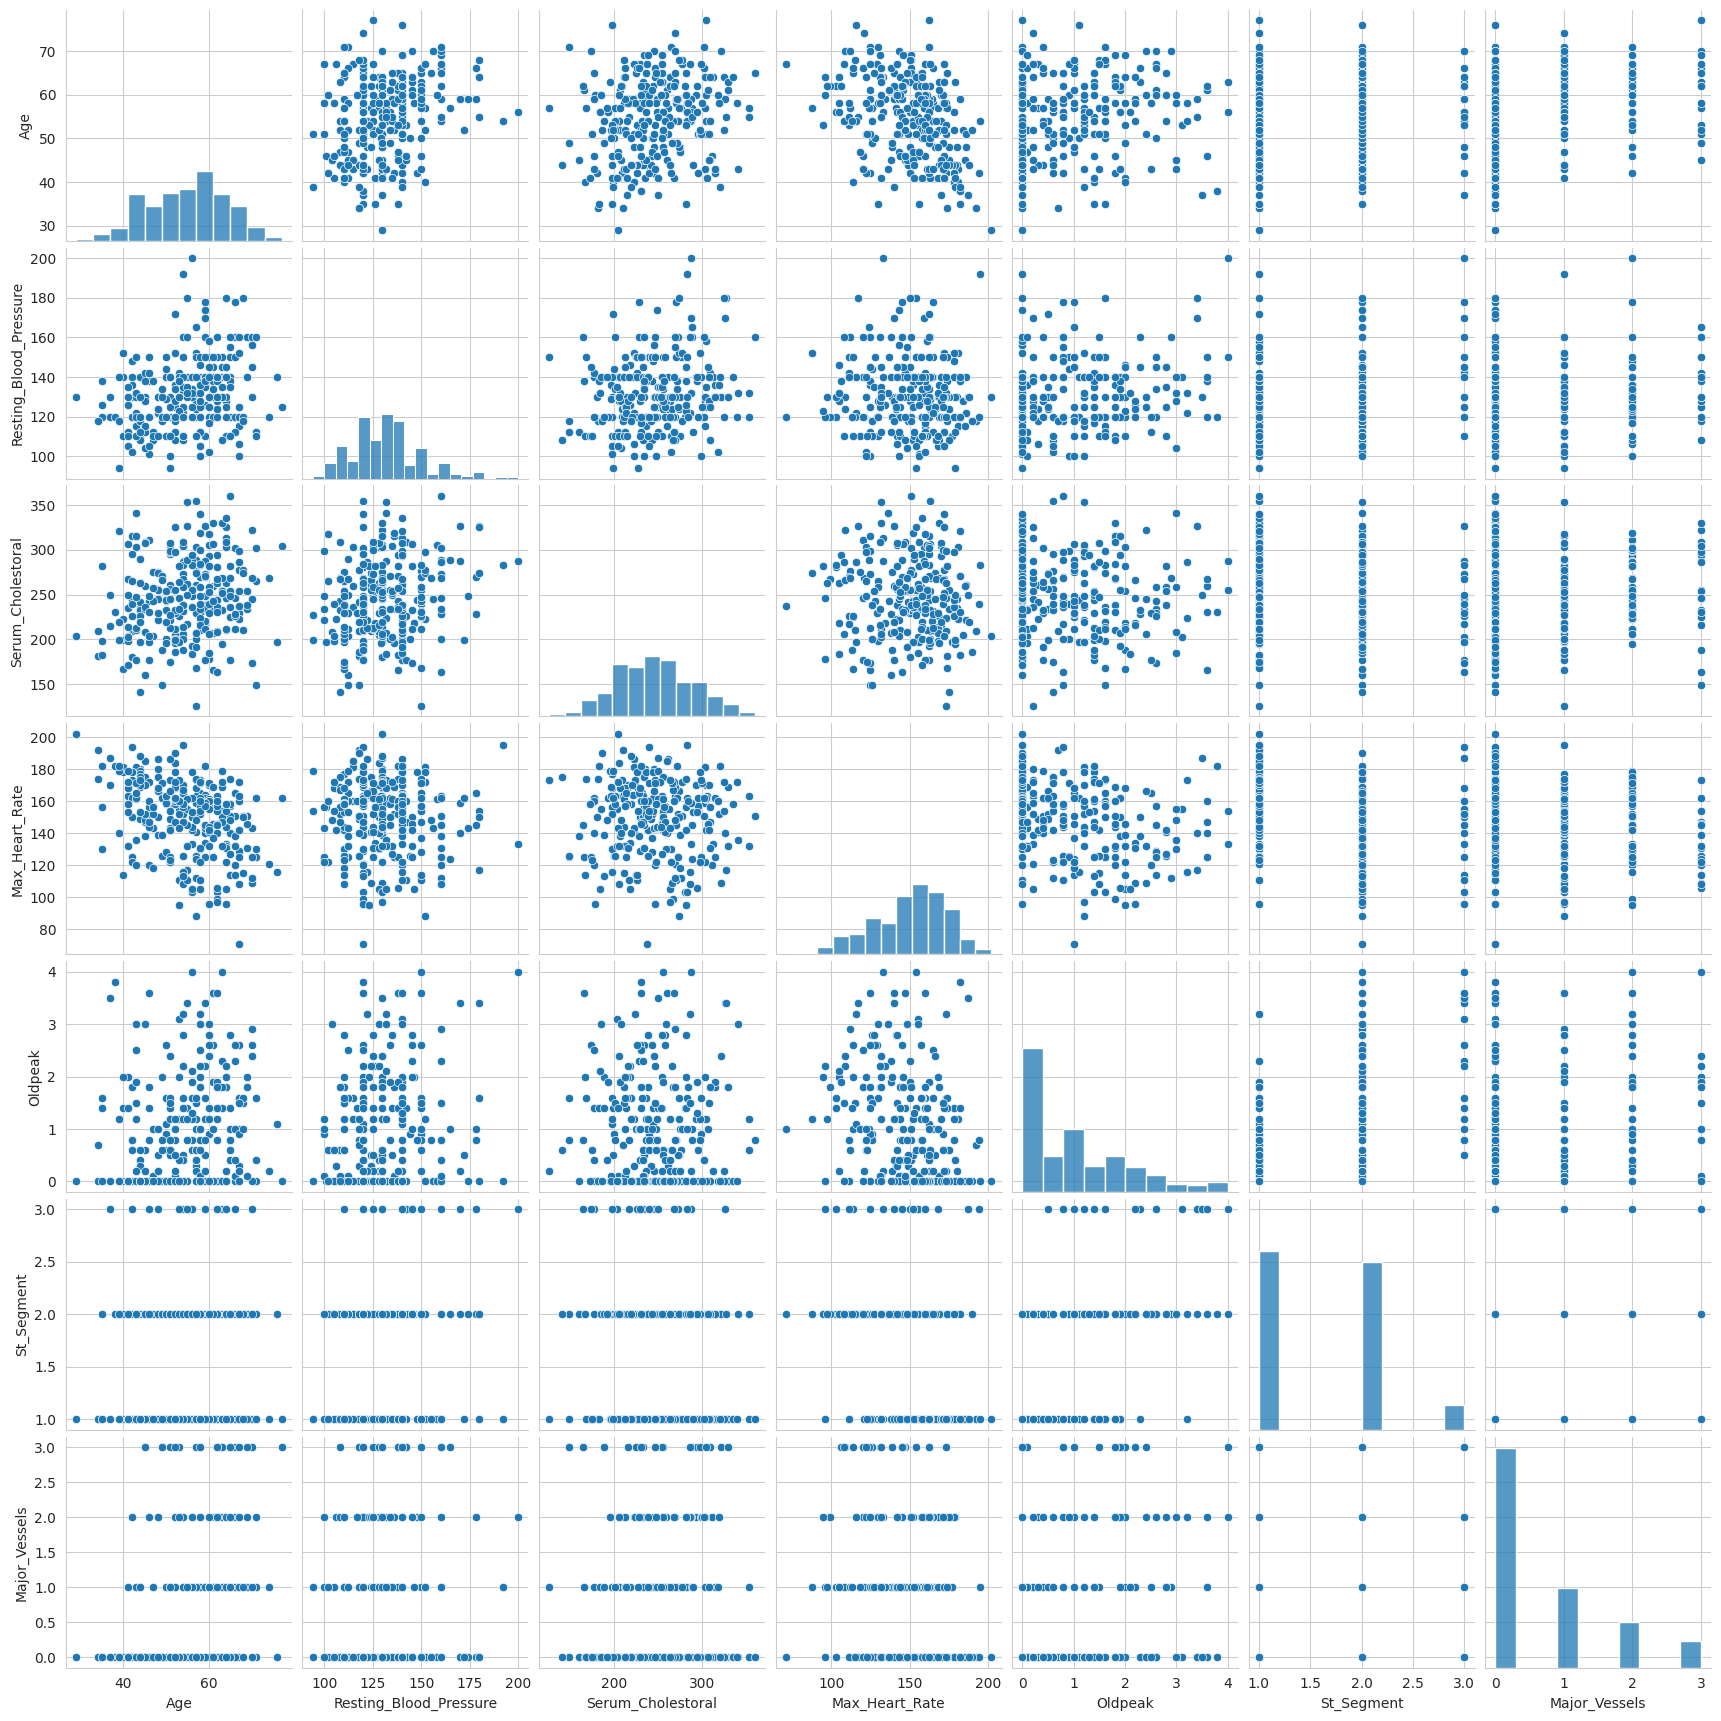

In [ ]:
sns.pairplot(data=df2)

**Question 5b:** Multivariate Analysis

,Oldpeak,St_Segment
Heart_Disease,,
1,0.2,1.0
2,1.4,2.0


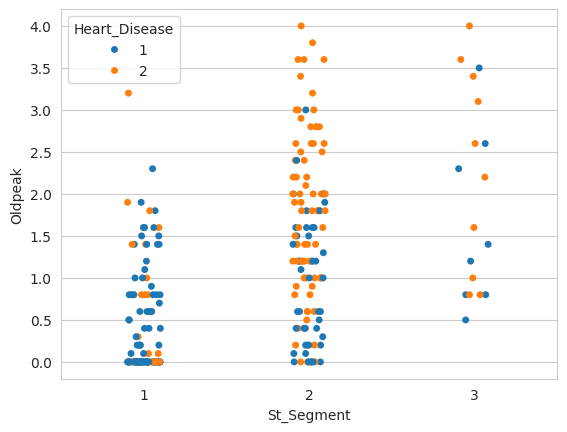

In [ ]:
#Heart_Disease with Oldpeak and St_Segment
# Oldpeak and St_Segment has strong correlation between themselves (0.61), and also high correlation with Heart disease(0.42),
#hence they  influence heart_disease simultaneously

sns.stripplot(data=df2,y='Oldpeak',x='St_Segment', hue='Heart_Disease')

df2.groupby('Heart_Disease')[['Oldpeak','St_Segment']].median()

# so we can infer that most patients with  high Oldpeak value, and St_Segment value of 2 and 3 show  heart disease presence, than patients with lower Oldpeak value and ST_Segment value of 1

<Axes: xlabel='Age', ylabel='Max_Heart_Rate'>

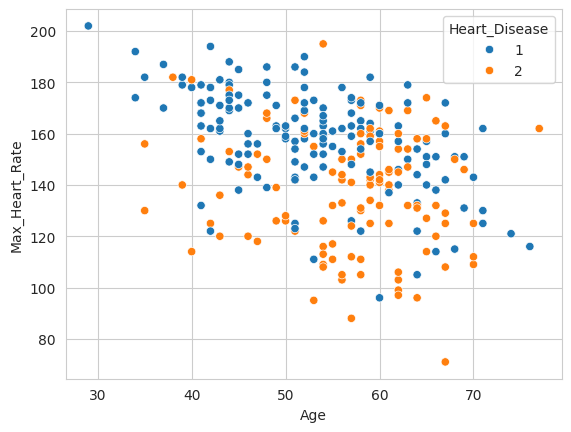

In [ ]:
#Analysis of Heart_Disease with Max_Heart_Rate and Age

sns.scatterplot(data=df2,x='Age',y='Max_Heart_Rate',hue='Heart_Disease')

# patients of higher age who have low max_heart_rate, has higher tendency to have heart_disease